<a href="https://colab.research.google.com/github/allaalmouiz/deepLearning_stroke_prediction/blob/main/deepLearning_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Risk Prediction Challange - Module 4
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**

I’ve been asked to assist a public health organization in identifying individuals most at risk of having a stroke, using a dataset of patient information and health indicators.

So, I will build a Deep Learning **Binary Classification Model** to predicts whether a patient will experinece a stroke or not.


### **Dataset**
Stroke Risk Dataset (Downloaded  from Kaggle: [Data](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)), and been diwnloaded to [my repo](https://github.com/allaalmouiz/deepLearning_stroke_prediction/blob/739145a7bf7db1e6814682ae25a67beef25940fe/healthcare-dataset-stroke-data.csv).

The dataset variables include:
* `id`: Unique identifier for each patient.
* `gender`: Patient’s gender.
* `aga`: Age of the patient.
* `hypertension`:  if the patient has hypertension.
* `ever_married`: Marital status.
* `work_type`: Type of employment.
* `heart_disease`: if the patient has a history of heart disease.
* `Residence_type`: Patient’s area of residence.
* `avg_glucose_level`: Average blood glucose level.
* `bmi`: Body Mass Index.
* `smoking_status`: Patient’s smoking status.
* `stroke`Whether the patient experienced a stroke.

### **Important Assumptions**
The health organization is concered about predicting all the people who have stroke correctly.
* **False Negatives**: the cost of false negatives is high, as it will cost lives! A person who is having a stroke and been predicted as no-stroke is a huge failure for the health organization.
* **False Positives**: the cost of false positives isn't as high as teh false negatives, it's just concidered a false alarm compared to the consequneces of the previous. However, it's still considered to waste the hospital cabibilites.


## **2- Dataset Loading**

In [1]:
# Clone the dataset from my Github Repo
! git clone https://github.com/allaalmouiz/deepLearning_stroke_prediction.git

%cd deepLearning_stroke_prediction

fatal: destination path 'deepLearning_stroke_prediction' already exists and is not an empty directory.
/content/deepLearning_stroke_prediction


In [2]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall




## **3- Exploring the Dataset**

In [3]:
# Loading the Dataset
df = pd.read_csv("/content/deepLearning_stroke_prediction/healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Removing the ID
df.drop("id", axis=1, inplace=True)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Notice**:
I removed the `id` as it have high values, and will effect the performace of the model since it contain large index, that the model will mistaken its importance.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
print(f"The dataset has {df.shape[0]} rows (Samples), and {df.shape[1]} coulums (features)")

The dataset has 5110 rows (Samples), and 11 coulums (features)


**Notice**: There are missing values in  `bmi` only.

The **categorial values** are `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status`. Also, `stroke`, `hypertension` and `heart_disease` are a categorical data, but here they're numerical and we have to cast type them.

The **Numerical Values** are `age`, `avg_glucose_level ` and `bmi` only.


In [9]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
print("Categorical Columns")
print(categorical)

print("")

numerical = list(df.dtypes[df.dtypes != 'object'].index)
print("Numerical Columns")
print(numerical)

Categorical Columns
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Numerical Columns
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [10]:
# Do the modification based on the Analysis Above
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke' ]
numerical = ['age','avg_glucose_level', 'bmi']

In [11]:
# Information about the data and it's values

print ("Information about the Categorical columns")
for col in df[categorical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")
print("======")

print ("Information about the Numerical columns")
for col in df[numerical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")


Information about the Categorical columns
gender
first 5 unique values ['Male' 'Female' 'Other']
unique values 3

ever_married
first 5 unique values ['Yes' 'No']
unique values 2

work_type
first 5 unique values ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
unique values 5

Residence_type
first 5 unique values ['Urban' 'Rural']
unique values 2

smoking_status
first 5 unique values ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
unique values 4

hypertension
first 5 unique values [0 1]
unique values 2

heart_disease
first 5 unique values [1 0]
unique values 2

stroke
first 5 unique values [1 0]
unique values 2

Information about the Numerical columns
age
first 5 unique values [67. 61. 80. 49. 79.]
unique values 104

avg_glucose_level
first 5 unique values [228.69 202.21 105.92 171.23 174.12]
unique values 3979

bmi
first 5 unique values [36.6  nan 32.5 34.4 24. ]
unique values 418



In [12]:
# Checking duplicating rows in teh dataset

df.duplicated().sum()

np.int64(0)

In [13]:
df[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


## **4- Cleaning the Dataset**

### Handling the Mssing values of `bmi`

In [14]:
bmi_mean = df["bmi"].mean()
df['bmi'] = df['bmi'].fillna(bmi_mean)
print(bmi_mean)
print(f"The null values in the bmi are {df['bmi'].isnull().sum()}")
print(" ")

28.893236911794666
The null values in the bmi are 0
 


Yayyyyy!! We fixed the null values in `bmi` coulmn.

### Encoding the categorical data

In [15]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


In [16]:
# Encoding the categorical data

for col in categorical:
    df[col] = df[col].astype('category').cat.codes

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Now is the Dataset is ready for **visualization** and ready for **processing**

## **5- Visualization Stage**

### **A: Correlation Heat Map**

Text(0.5, 1.0, 'Features Correlation Heatmap')

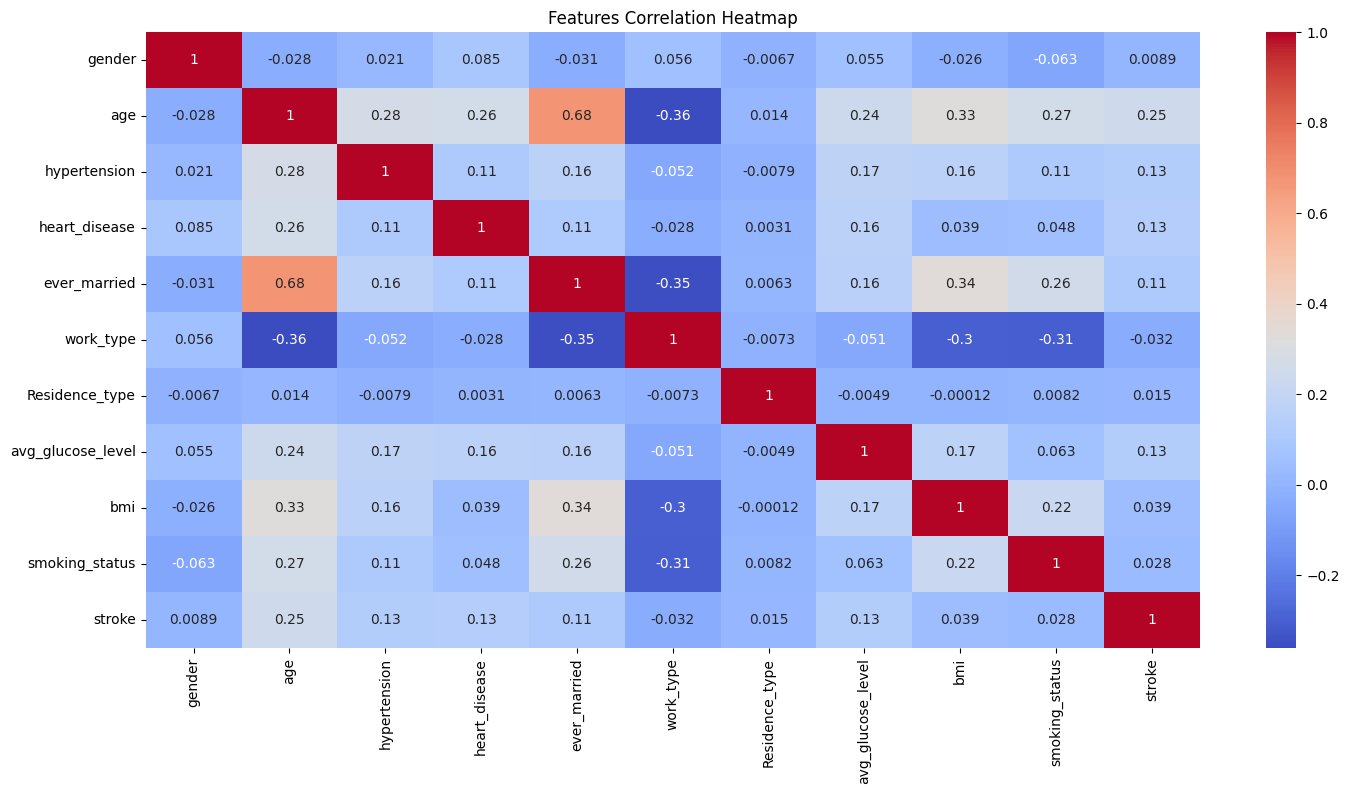

In [17]:
# Check the features relationships

plt.figure(figsize = (17, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features Correlation Heatmap")

To see the **correaltion with other features** and stroke with a descending order.

In [18]:
corr = df.corr(numeric_only=True)["stroke"].sort_values(ascending=False)
print(corr)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038947
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64


In [19]:
strong_corr = corr[abs(corr) > 0.1]
print(strong_corr)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
Name: stroke, dtype: float64


**Notice**: it's clear that most features that are corelated with `stroke` are:
`age`, `heart_disease`, `avg_glucose_level`, `hypertension` and `ever_married`

### **B: Stroke Analysis** - Histogram

Text(0, 0.5, 'Frequency')

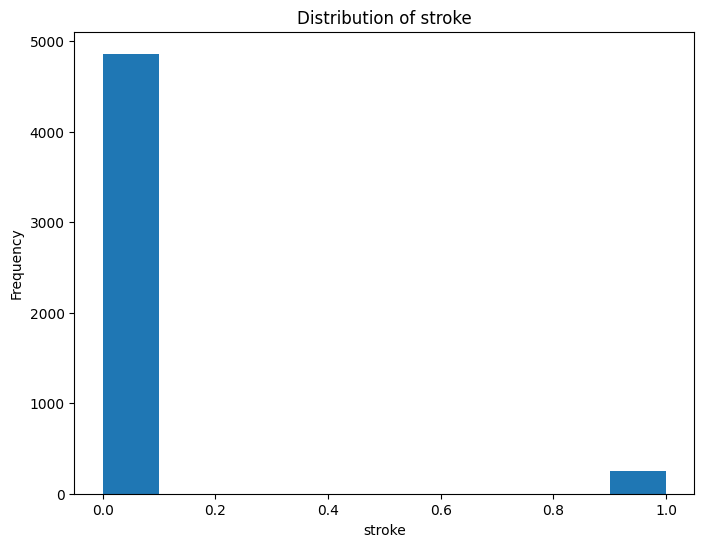

In [20]:
# A Histogram for stroke

plt.figure(figsize = (8,6))
df["stroke"].plot(kind="hist")
plt.title("Distribution of stroke")
plt.xlabel("stroke")
plt.ylabel("Frequency")


In [21]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


**Notice:** the histogram for `stroke` shows that the dataset is **imbalanced** since the people with no-stroke(0) are `4861`, and with stroke(1) are only `249`.

This would surely cause the model to predict no-stroke(0) more often than (1)

Solutions I might use:
- Evaluate with `F1 score` and `ROC–AUC`, not `accuracy`.
- `SMOTENC()` later on the training data.  

### **C: Distribution of Numerical categories - Histogram, and KDEs**


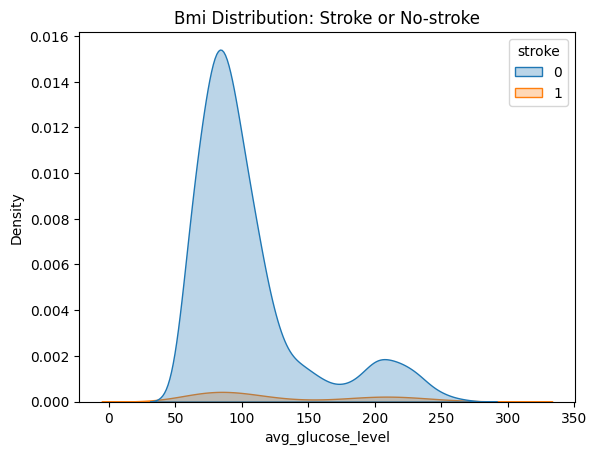

In [22]:
# KDE for the bmi based on if the person have stroke or not

sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True, alpha=0.3)
plt.title("Bmi Distribution: Stroke or No-stroke")
plt.show()

**Notice**: It's clear that the people with stroke(1) have more high and low ranges for glucose compared to the people with no-stroke(0) whom their glucose level is ranging in almost the normal range.

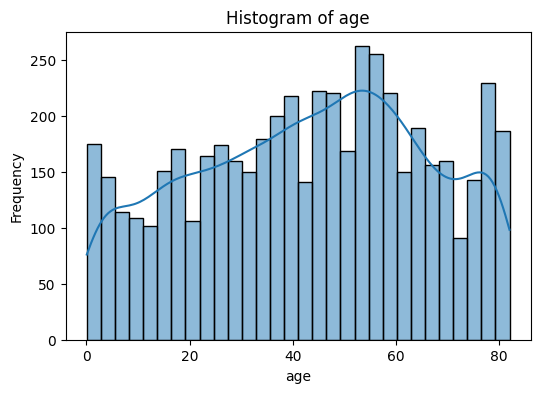

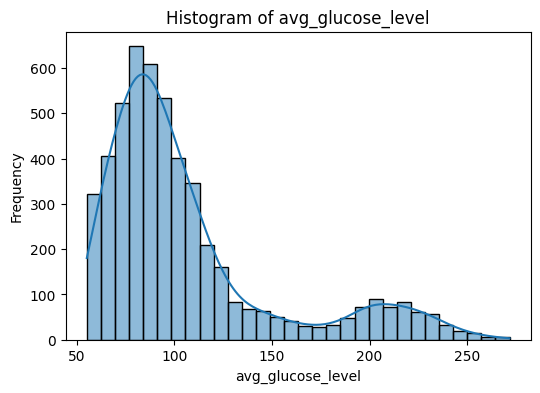

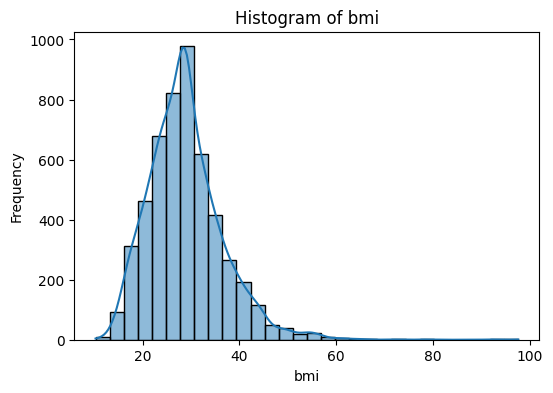

In [23]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)  # kde=True adds a smooth curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Notice**

* `age`: distribution is almost an even distibution
* `bmi` and `avg_glucose_level` is a positive Skewed distribution.

Later, we will Standerdize the distribution, cause specially `bmi` and `avg_glucose_level` distribution I find them a troublesome a bit.

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### **D- Boxplots for numerical features `['age']` against `stroke`**

<Axes: xlabel='stroke', ylabel='age'>

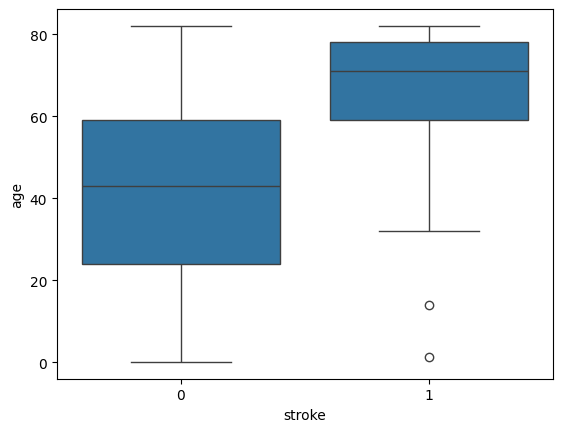

In [25]:
sns.boxplot(x="stroke", y="age", data=df)

**Notice:**

It's clear that `stroke` is clearly high on average for older people.

**More age** -> **higher stroke propapility.**

## **6- Building the Classification Neural Network Model**
Build a model that predicts whether an individual will have a stroke or not based on the other features.

* **First Model:** Simple Classification model **(Baseline model)**.
* **Second Model:** Build a classification neural network.
* **Third Model:** Classification neural network model, Model layers: Input(64) -> hidden(32) -> hidden(4) -> Output(1), Drop Out, Regularization"
* **Fourth Model**: GridSearchCV, Classification neural network model, Model layers: Input(64) -> hidden(32) -> hidden(4) -> Output(1), Drop Out, Regularization, Cross Validation.

### **First Model:** Simple Logistic classification model - I will start with a very simple structure to understand the model evolution through the different architecture **(Baseline model).**


In [26]:
df.shape

(5110, 11)

In [27]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1


#### Splitting the dataset

In [28]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [29]:
print(f"The shape of X is {X.shape} and the shape of y is {Y.shape}")

The shape of X is (5110, 10) and the shape of y is (5110,)


In [30]:
# Splitting the dataset into training and testing splits.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [31]:
from imblearn.over_sampling import SMOTENC

# Find indices of categorical columns in X_train
categorical_features = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status']
categorical_indices = [df.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
sm = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print("Original training shape:", X_train.shape, Y_train.shape)
print("Resampled training shape:", X_train_res.shape, Y_train_res.shape)


Original training shape: (4088, 10) (4088,)
Resampled training shape: (7802, 10) (7802,)


In [32]:
X_train_res.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,79.0,0,0,1,3,0,112.64,28.5,1


In [33]:
X_test.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0


In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X_train_res.shape, Y_train_res.shape

((4088, 10), (1022, 10), (4088,), (1022,), (7802, 10), (7802,))

In [35]:
X_train_res =  X_train_res.values
X_test = X_test.values
Y_train_res = Y_train_res.values
Y_test = Y_test.values

In [36]:
X_train_res[0]

array([  1.  ,  79.  ,   0.  ,   0.  ,   1.  ,   3.  ,   0.  , 112.64,
        28.5 ,   1.  ])

In [37]:
# Building the logistic regression model

model1 = LogisticRegression()
model1.fit(X_train_res, Y_train_res)
y_pred_model1 = model1.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Evaluating the Classification Model

print("Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) ")
print("===============")
print("Accuracy:", accuracy_score(Y_test, y_pred_model1))
print("Recal Score:", recall_score(Y_test, y_pred_model1))
print("Precision Score:", precision_score(Y_test, y_pred_model1))
print("F1 Score:", f1_score(Y_test, y_pred_model1))
print("===============")
print("Classification Report: \n", classification_report(Y_test, y_pred_model1))
print("===============")
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred_model1))


Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) 
Accuracy: 0.726027397260274
Recal Score: 0.7096774193548387
Precision Score: 0.1437908496732026
F1 Score: 0.2391304347826087
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       960
           1       0.14      0.71      0.24        62

    accuracy                           0.73      1022
   macro avg       0.56      0.72      0.54      1022
weighted avg       0.92      0.73      0.80      1022

Confusion Matrix: [[698 262]
 [ 18  44]]


**`Model1`Commenting in the results**

*(Simple classification model using scikit-learn’s library, normal train_test_split, standerdization)*


The dataset imbalance significantly influences model behavior. While the model achieves **high recall (73%) for the minority class (stroke)**, indicating that most true stroke cases are detected, it suffers from **very low precision (14%), meaning that a large proportion of predicted stroke cases are false positives.** This suggests that the model favors sensitivity over specificity, likely due to the class imbalance handling strategy. As a result, the decision boundary shifts toward predicting more positive cases, increasing false alarms.


To enhance the performance on this dataset, I will buil `model 2` that is using neural networks next.

### **Second Model:** Build a classification neural network.
(Simple Simple classification neural network model, Model layers: Input(32) -> hidden(16) -> hidden(8) -> Output(1))


In [39]:
print("X_train_res shape:", X_train_res.shape)
print("X_train shape:", X_train.shape)


X_train_res shape: (7802, 10)
X_train shape: (4088, 10)


In [40]:
import random
import tensorflow as tf

# Set seed value
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)
model2 = Sequential()
model2.add(Dense(16, input_dim = X_train_res.shape[1], activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Model compile
model2.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# Model fit
history = model2.fit(X_train_res,
                Y_train_res,
                validation_split=0.1,
                epochs=120,
                batch_size=32,
                verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [42]:
# Model predict
y_proba2 = model2.predict(X_test)
y_pred_model2 = (y_proba2 >= 0.49).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [43]:
# Evaluating the Classification Model

print("Results for Model 2 (Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1))")
print("===============")
print("Accuracy:", accuracy_score(Y_test, y_pred_model2))
print("Recal Score:", recall_score(Y_test, y_pred_model2))
print("Precision Score:", precision_score(Y_test, y_pred_model2))
print("F1 Score:", f1_score(Y_test, y_pred_model2))
print("===============")
print("Classification Report: \n", classification_report(Y_test, y_pred_model2))
print("===============")
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred_model2))

Results for Model 2 (Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1))
Accuracy: 0.7328767123287672
Recal Score: 0.6451612903225806
Precision Score: 0.13745704467353953
F1 Score: 0.22662889518413598
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       960
           1       0.14      0.65      0.23        62

    accuracy                           0.73      1022
   macro avg       0.55      0.69      0.53      1022
weighted avg       0.92      0.73      0.80      1022

Confusion Matrix: [[709 251]
 [ 22  40]]


**`Model2`Commenting in the results**

*(Simple classification neural network model*

* **Model layers:** Input(10) -> hidden(16) -> hidden(8) -> Output(1)
* **Oprimizer:** adam
* **epochs**=120
* **batch_size**=32


The model achieves high **overall accuracy (73%)**, it's still worse compared to the first model in terms of class 1 (Minority). For the minority class (stroke), with precision (0.14) and recall (0.65), indicating that the model beahvious aggresively with predictions, it tries to predict stroke more often when it sense a pattern.

### **Third Model:** A Classification neural network with drop out, regualrization.
Classification neural network model, Model layers: Input(64) -> hidden(32) -> hidden(4) -> Output(1), Drop Out, Regularization")

In [44]:
from tensorflow.keras import regularizers

# Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)
model3 = Sequential()
model3.add(Dense(16, input_dim = X_train_res.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model3.add(Dropout(0.2))
model3.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

# Model compile
model3.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# Model fit
history = model3.fit(X_train_res,
                Y_train_res,
                validation_split=0.1,
                epochs=150,
                batch_size=16,
                verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [46]:
# Model predict
y_proba3 = model3.predict(X_test)
y_pred_model3 = (y_proba3 >= 0.49).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [47]:
# Evaluating the Classification Model

print("Results for Model 3( Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)), Drop Out, Regularization")
print("===============")
print("Accuracy:", accuracy_score(Y_test, y_pred_model3))
print("Recal Score:", recall_score(Y_test, y_pred_model3))
print("Precision Score:", precision_score(Y_test, y_pred_model3))
print("F1 Score:", f1_score(Y_test, y_pred_model3))
print("===============")
print("Classification Report: \n", classification_report(Y_test, y_pred_model3))
print("===============")
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred_model3))


Results for Model 3( Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)), Drop Out, Regularization
Accuracy: 0.6731898238747553
Recal Score: 0.8870967741935484
Precision Score: 0.14397905759162305
F1 Score: 0.24774774774774774
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79       960
           1       0.14      0.89      0.25        62

    accuracy                           0.67      1022
   macro avg       0.57      0.77      0.52      1022
weighted avg       0.94      0.67      0.76      1022

Confusion Matrix: [[633 327]
 [  7  55]]


**`Model3`Commenting in the results**

*(Classification neural network model*

* **Model layers:** Input(10) -> hidden(16) -> (Dropout 0.2) -> hidden(8) -> (Dropout 0.2) -> Output(1)
* **Regulizer**: l2 = 0.01
* **Oprimizer:** adam
* **epochs**=150
* **batch_size**=16

Model performance in terms of medical acceptibility is better since the minority class (1: stroke) now is having 0.89 recall which means that the model will predicts the stroke cases almost right, and as per seen in the confusion matrix that only 7 strokes were false negatives.

If the model is finetuned (the hyper parameter) the model performance will behave good.

### **Fourth Model:** Build a classification neural network (Tuning the hyperparameter using `GridSearchCV()`



In [49]:
!pip install --upgrade scikeras
!pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [48]:
from scikeras.wrappers import KerasClassifier

def build_model(l2_value=0.001, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_value), input_dim=X_train_res.shape[1]))
    model.add(Dropout(dropout_rate))

    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(l2_value)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [49]:
# Wrapping the model in Keras Classifier
model = KerasClassifier(model=build_model, verbose=0)

In [66]:
param_grid = {
    "model__l2_value": [0.1],
    "model__learning_rate": [0.0001, 0.0001, 0.001],
    "batch_size": [16],
    "epochs": [150]
}

In [67]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [68]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [69]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',
    cv=3,
    n_jobs=-1
)

grid_result = grid.fit(X_train_res, Y_train_res)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
print("Best score:", grid_result.best_score_)
print("Best params:", grid_result.best_params_)


Best score: 0.7191715573464942
Best params: {'batch_size': 16, 'epochs': 150, 'model__l2_value': 0.1, 'model__learning_rate': 0.001}


In [71]:
# Predict probabilities of stroke for the test set

y_proba_model4 = grid.predict_proba(X_test)  # returns (n_samples, 2)
y_proba_model4 = y_proba_model4[:, 1]              # probability of class 1 (stroke)
y_pred_model4 = (y_proba_model4 >= 0.49).astype(int)


In [72]:
# Evaluating the Classification Model

print("Results for Model 4( Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)), Grid Search")
print("===============")
print("Accuracy:", accuracy_score(Y_test, y_pred_model4))
print("Recal Score:", recall_score(Y_test, y_pred_model4))
print("Precision Score:", precision_score(Y_test, y_pred_model4))
print("F1 Score:", f1_score(Y_test, y_pred_model4))
print("===============")
print("Classification Report: \n", classification_report(Y_test, y_pred_model4))
print("===============")
print("Confusion Matrix:", confusion_matrix(Y_test, y_pred_model4))


Results for Model 4( Classification neural network model, Model layers: Input(10) -> hidden(16) -> hidden(8) -> Output(1)), Grid Search
Accuracy: 0.6819960861056752
Recal Score: 0.8870967741935484
Precision Score: 0.14745308310991956
F1 Score: 0.25287356321839083
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80       960
           1       0.15      0.89      0.25        62

    accuracy                           0.68      1022
   macro avg       0.57      0.78      0.53      1022
weighted avg       0.94      0.68      0.76      1022

Confusion Matrix: [[642 318]
 [  7  55]]


**`Model4`Commenting in the results**

*(Classification neural network model*

* **Model layers:** Input(10) -> hidden(16) -> (Dropout 0.2) -> hidden(8) -> (Dropout 0.2) -> Output(1)

`Best params: {'batch_size': 16, 'epochs': 150, 'model__l2_value': 0.1, 'model__learning_rate': 0.001}`


Using `GridSearchCV` we obtained this model with 0.89 recall in class 1 (stroke) which is the highest number compare to all the other models with only 7 false negatives and even for class 0, it predicted more accuate results with recall 0.67 (more 8 accurate results with 9 less false positives.

Although that this model still should be improved but since it's highly senitive to stroke cases with the least number of false negatives - **I do recommend it**.